In [8]:
%pip install scikit-learn scikit-lego

Note: you may need to restart the kernel to use updated packages.


In [10]:
import numpy as np #You need to import all of these.
import matplotlib.pylab as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.datasets import make_classification

In [11]:
X, y = make_classification(n_samples=2000, n_features=2,#I realized that "n_samples" change the amount of dots in my graph.
                           n_redundant=0, random_state=21,
                           class_sep=1.75, flip_y=0.1) #"class_sep" noktalar arasındaki ayrımı kontrol ediyor. Diğerini anlamadım.plt.scatter(X[:, 0], X[:, 1], c=y, s=50); #"s=50" noktanın büüyklüğünü gösteriyor.

In [12]:
def make_plots(): #Burada make_plots() fonksiyonunu define ediyoruz.
    X_new = np.concatenate([
        np.random.uniform(np.min(X[:, 0]), np.max(X[:, 0]), (20000, 1)),
        np.random.uniform(np.min(X[:, 1]), np.max(X[:, 1]), (20000, 1))
    ], axis=1)
    plt.figure(figsize=(16, 4))
    plt.subplot(141)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=5)
    plt.title("original data")
    plt.subplot(142)
    plt.scatter(X_new[:, 0], X_new[:, 1], c=clf1.predict_proba(X_new)[:, 1], s=5)
    plt.title("ens1")
    plt.subplot(143)
    plt.scatter(X_new[:, 0], X_new[:, 1], c=clf2.predict_proba(X_new)[:, 1], s=5)
    plt.title("ens2")
    plt.subplot(144)
    plt.scatter(X_new[:, 0], X_new[:, 1], c=clf3.predict_proba(X_new)[:, 1], s=5)
    plt.title("ens3");

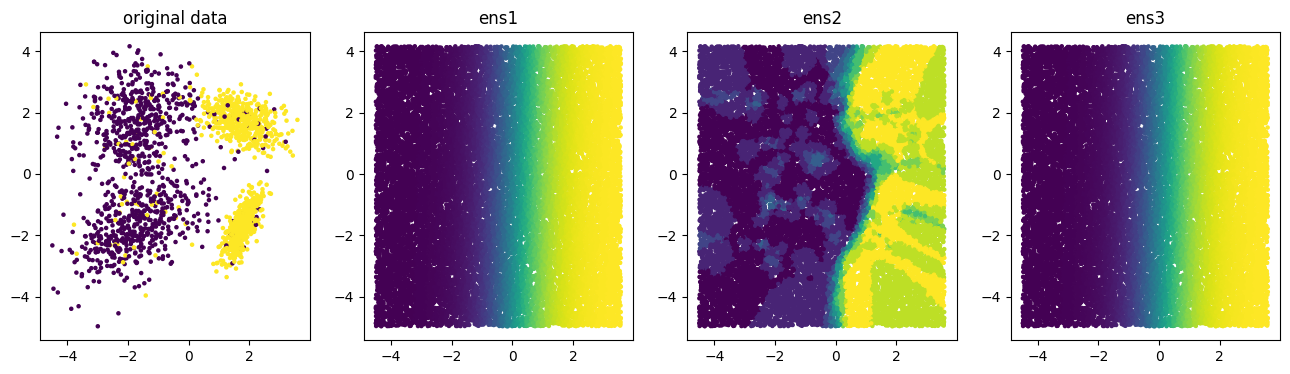

In [13]:
clf1 = LogisticRegression().fit(X, y)#Creates an instance of the logistic regression model from scikit-learn.
clf2 = KNeighborsClassifier(n_neighbors=10).fit(X, y)#K-nearest neighbors classifier with 10 neighbors.
clf3 = VotingClassifier(estimators=[('clf1', clf1), ('clf2', clf2)], #clf1 =Logistic, clf2=KNeighbor
                        voting='soft',
                        weights=[999999, 2])#Hangisinin ağırlığını arttırırsam ens3 ona benziyor. Örenğin burada ilk değerin ağrılığını arttırdım ve sonuç olarak ens1'e benzeyen bir sonuç çıktı.
clf3.fit(X, y)

make_plots()#Daha önce oluşturduğumuz make_plots() fonskiyonunu burada grafikler için kullanıyoruz.

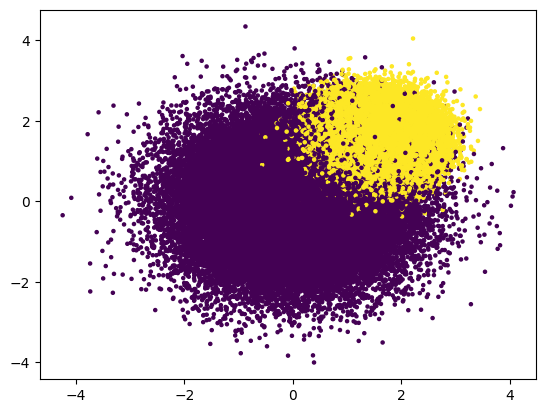

In [19]:
from sklearn.datasets import make_blobs #You can change the number of dots or the center.
X, y = make_blobs(100000, centers=[(0, 0), (1.5, 1.5)], cluster_std=[1, 0.5]) #cluster_std dağılma miktarını gösteriyor galiba?
plt.scatter(X[:, 0], X[:, 1], c=y, s=5); #"s=5" is the size of dots.You can change that value to make those dots bigger.

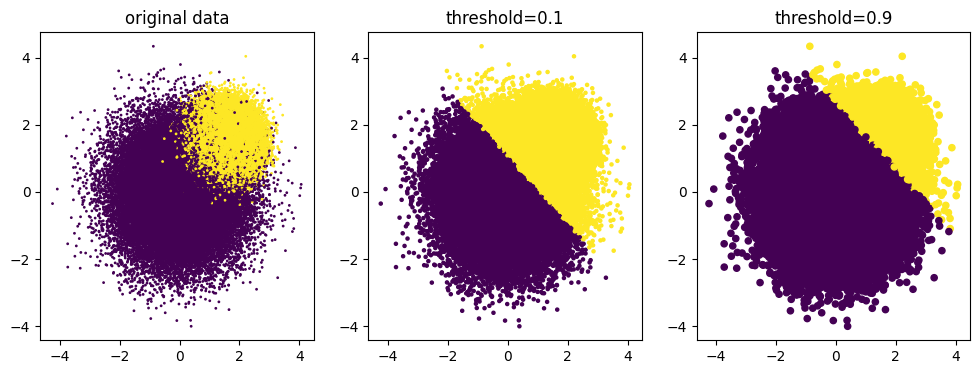

In [20]:
m1 = Thresholder(LogisticRegression(solver='lbfgs'), threshold=0.1).fit(X, y)#what does m1 do? Ask copilot?
m2 = Thresholder(LogisticRegression(solver='lbfgs'), threshold=0.9).fit(X, y)#What does m2 do? Ask copilot?
plt.figure(figsize=(12, 4)) #12 "width" oluyor, 4 "height" oluyor.
plt.subplot(131)#not sure what this number 131 means..?
plt.scatter(X[:, 0], X[:, 1], c=y, s=1) #s=1 yapınca noktalar daha küçük oluyor.
plt.title("original data") #Üzerine başlık ekliyoruz.
plt.subplot(132)#I don't know what this does..?
plt.scatter(X[:, 0], X[:, 1], c=m1.predict(X), s=5)
plt.title("threshold=0.1")
plt.subplot(133)#I don't know what is this..?
plt.scatter(X[:, 0], X[:, 1], c=m2.predict(X), s=20)#s=20 yapınca noktalar daha büyük oldular.
plt.title("threshold=0.9"); #Demekki noktaların büyüklüğü s'ye bağlıdır. Çünkü s'nin değerini arttırdığım zaman noktalar büyüdüler.

In [24]:
from sklearn.pipeline import Pipeline
from sklego.meta import Thresholder #Thresholder from scikit-lego, which is a meta-estimator designed to fine-tune classification thresholds in scikit-learn.
from sklearn.model_selection import GridSearchCV #GridSearchCV hyperparameter tuning via cross-validation.
from sklearn.metrics import precision_score, recall_score, accuracy_score, make_scorer
pipe = Pipeline([ #NOT SURE WHAT THIS DOES..?
    ("model", Thresholder(LogisticRegression(solver='lbfgs'), threshold=0.1))
])

mod = GridSearchCV(estimator=pipe,
                  param_grid = {"model__threshold": np.linspace(0.1, 0.9, 50)},
                  scoring={"precision": make_scorer(precision_score),
                            "recall": make_scorer(recall_score),
                            "accuracy": make_scorer(accuracy_score)},
                  refit="precision",
                  cv=5)

mod.fit(X, y);

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklego.datasets import load_chicken
from sklego.preprocessing import ColumnSelector
df = load_chicken(as_frame=True)
def plot_model(model):
    df = load_chicken(as_frame=True)
    model.fit(df[['diet', 'time']], df['weight'])
    metric_df = df[['diet', 'time', 'weight']].assign(pred=lambda d: model.predict(d[['diet', 'time']]))
    metric = mean_absolute_error(metric_df['weight'], metric_df['pred'])
    plt.figure(figsize=(12, 4))  # plt.scatter(df['time'], df['weight'])
    for i in [1, 2, 3, 4]:
        pltr = metric_df[['time', 'diet', 'pred']].drop_duplicates().loc[lambda d: d['diet'] == i]
        plt.plot(pltr['time'], pltr['pred'], color='.rbgy'[i])
    plt.title(f"linear model per group, MAE: {np.round(metric, 2)}");

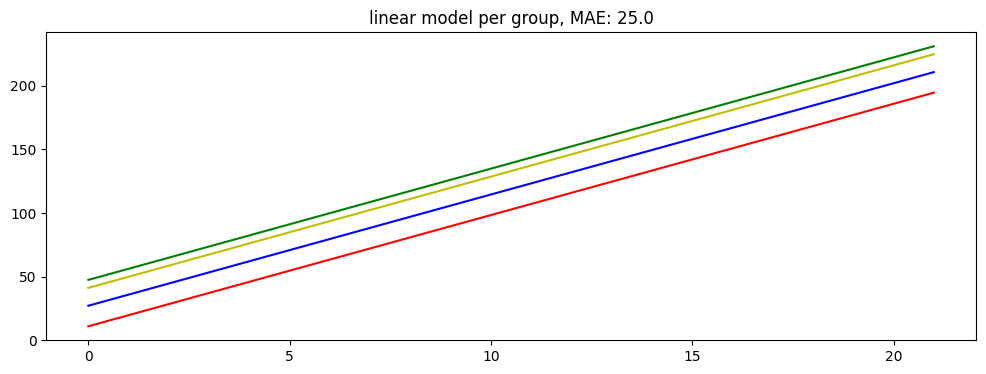

In [26]:
feature_pipeline = Pipeline([
    ("datagrab", FeatureUnion([
        ("discrete", Pipeline([
            ("grab", ColumnSelector("diet")),
            ("encode", OneHotEncoder(categories="auto"))
        ])),
        ("continuous", Pipeline([
            ("grab", ColumnSelector("time")),
            ("standardize", StandardScaler())
        ]))
    ]))
])

pipe = Pipeline([
    ("transform", feature_pipeline),
    ("model", LinearRegression())
])

plot_model(pipe)


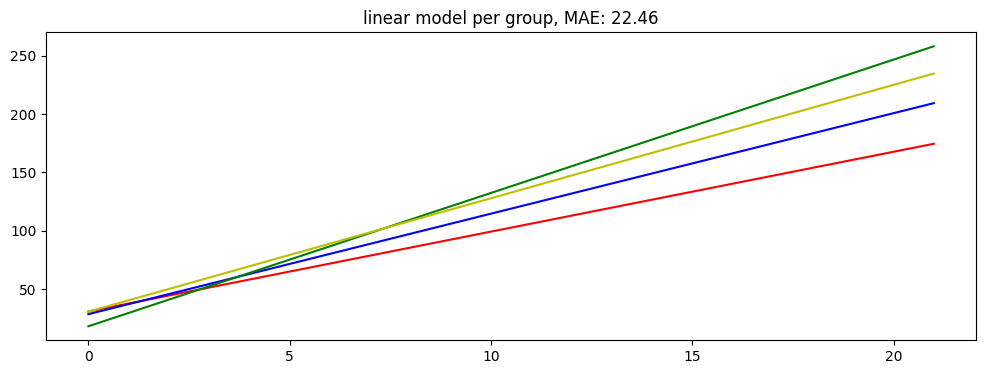

In [27]:
from sklego.meta import GroupedPredictor
mod = GroupedPredictor(LinearRegression(), groups=["diet"])
plot_model(mod)

In [28]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression, Ridge
from sklearn.model_selection import cross_val_score
from sklego.meta import ZeroInflatedRegressor
# Note the final line of code in this block. We're setting y=0 for all weekend dates
# while we simulate standard regression data for all the other dates.
df = (pd.DataFrame({'dt': pd.date_range("2018-01-01", "2021-01-01")})
      .assign(x=lambda d: np.random.normal(0, 1, d.shape[0]))
      .assign(weekend = lambda d: (d['dt'].dt.weekday >= 5).astype(np.int16))
      .assign(y=lambda d: np.where(d['weekend'], 0, 1.5 + 0.87 * d['x'] + np.random.normal(0, 0.2, d.shape[0]))))

In [141]:
X, y = df[['x', 'weekend']].values, df['y'].values

In [142]:
zir = ZeroInflatedRegressor(
    classifier=LogisticRegression(),
    regressor=Ridge()
)

lr = Ridge(random_state=0)

print('ZIR r²:', cross_val_score(zir, X, y).mean())
print(' LR r²:', cross_val_score(lr, X, y).mean())

ZIR r²: 0.9704491487650015
 LR r²: 0.8100300452645923


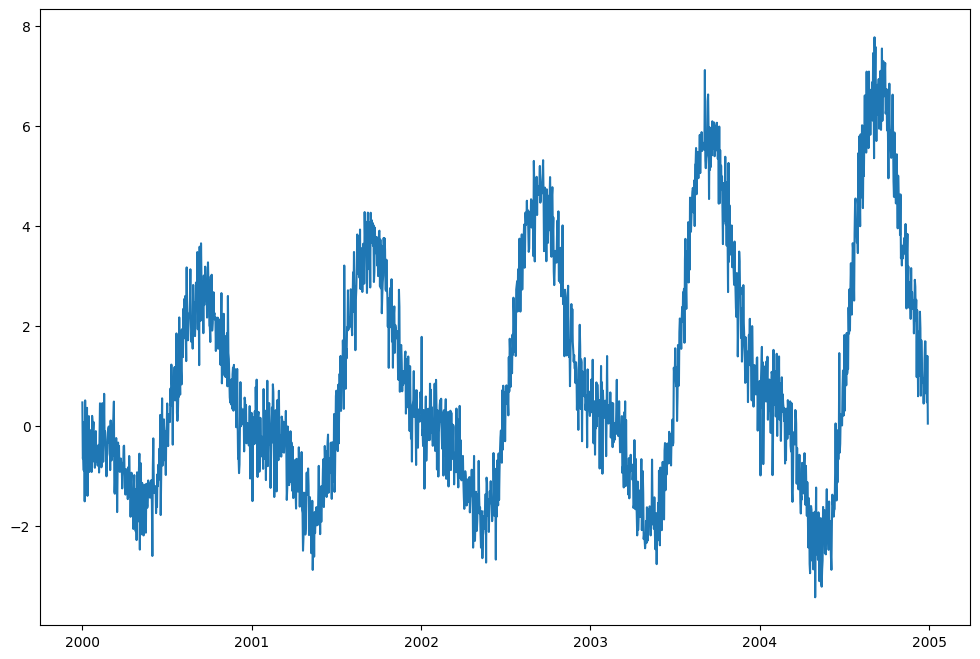

In [29]:
from sklego.datasets import make_simpleseries
import matplotlib.pylab as plt

yt = make_simpleseries(seed=1)
dates = pd.date_range("2000-01-01", periods=len(yt))
df = (pd.DataFrame({"yt": yt,
                  "date": dates})
      .assign(m=lambda d: d.date.dt.month)
      .reset_index())

plt.figure(figsize=(12, 8)) #I can change these values to change the graph size. (width,height) Here I increased the height to 8.
plt.plot(dates, make_simpleseries(seed=1));

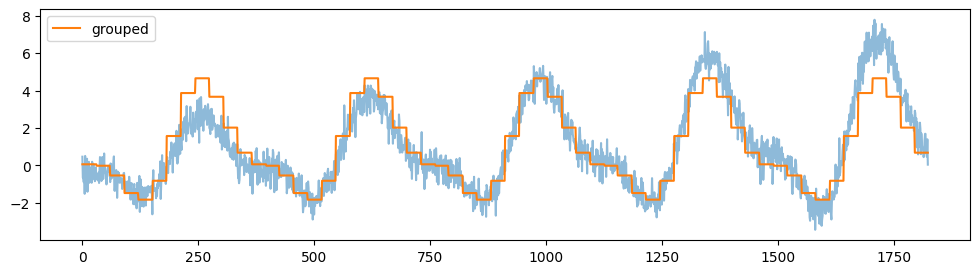

In [30]:
from sklearn.dummy import DummyRegressor
mod1 = (GroupedPredictor(DummyRegressor(), groups=["m"])
  .fit(df[['m']], df['yt']))

plt.figure(figsize=(12, 3))#Buradaki sayıları değiştirdiğim zaman boyutu değişiyor. (width, height)
plt.plot(df['yt'], alpha=0.5); #alpha=0.5 opaklığı değiştiriyor.
plt.plot(mod1.predict(df[['m']]), label="grouped")
plt.legend(); #Buradaki plt.legend()'i silince sol üstteki "grouped" yazı kutucuğu kayboluyor...

In [148]:
_=DummyRegressor().fit #Fit the baseline regressor.
?_

In [121]:
help(DecayEstimator) #Bu ne işe yarıyor??_?

Help on class DecayEstimator in module sklego.meta.decay_estimator:

class DecayEstimator(sklearn.base.MetaEstimatorMixin, sklearn.base.BaseEstimator)
 |  DecayEstimator(
 |      model,
 |      decay_func='exponential',
 |      check_input=False,
 |      decay_kwargs=None
 |  )
 |
 |  Morphs an estimator such that the training weights can be adapted to ensure that points that are far away have
 |  less weight.
 |
 |  This meta estimator will only work for estimators that allow a `sample_weights` argument in their `.fit()` method.
 |  The meta estimator `.fit()` method computes the weights to pass to the estimator's `.fit()` method.
 |
 |  !!! warning
 |      It is up to the user to sort the dataset appropriately.
 |
 |  !!! warning
 |      By default all the checks on the inputs `X` and `y` are delegated to the wrapped estimator.
 |      To change such behaviour, set `check_input` to `True`.
 |      Remark that if the check is skipped, then `y` should have a `shape` attribute, which is

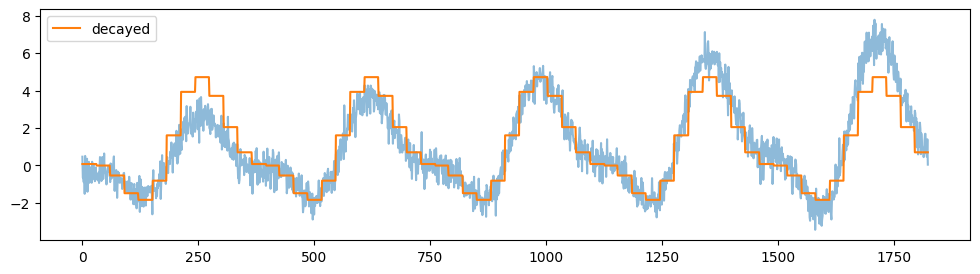

In [34]:
from sklearn.dummy import DummyRegressor
from sklego.meta import GroupedPredictor, DecayEstimator
import matplotlib.pylab as plt
mod = (GroupedPredictor(DecayEstimator(DummyRegressor()), groups=["m"])
        .fit(df[['index', 'm']], df['yt']))

plt.figure(figsize=(12, 3))
plt.plot(df['yt'], alpha=0.5);
plt.plot(mod.predict(df[['index', 'm']]), label="decayed")
plt.legend();